In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json

import sys

sys.path.append("../")

##################################################################
os.environ["TOKENIZERS_PARALLELISM"] = "false"
# os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3,4,5,6,7"
##################################################################

import logging
from src.utils import logging_utils
from src.utils import env_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(
    f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}"
)
logger.info(f"{transformers.__version__=}")

2025-09-07 01:35:51 __main__ INFO     torch.__version__='2.7.0+cu126', torch.version.cuda='12.6'
2025-09-07 01:35:51 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=8, torch.cuda.get_device_name()='NVIDIA A100 80GB PCIe'
2025-09-07 01:35:51 __main__ INFO     transformers.__version__='4.55.3'


In [3]:
from src.utils.training_utils import get_device_map

# model_key = "meta-llama/Llama-3.2-3B"
# model_key = "meta-llama/Llama-3.1-8B"
# model_key = "meta-llama/Llama-3.1-70B-Instruct"
model_key = "meta-llama/Llama-3.3-70B-Instruct"
# model_key = "meta-llama/Llama-3.1-405B-Instruct"

# model_key = "google/gemma-2-9b-it"
# model_key = "google/gemma-3-12b-it"
# model_key = "google/gemma-2-27b-it"

# model_key = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"

# model_key = "allenai/OLMo-2-1124-7B-Instruct"
# model_key = "allenai/OLMo-7B-0424-hf"

# model_key = "Qwen/Qwen2-7B"
# model_key = "Qwen/Qwen2.5-14B-Instruct"
# model_key = "Qwen/Qwen2.5-32B-Instruct"
# model_key = "Qwen/Qwen2.5-72B-Instruct"

# model_key = "Qwen/Qwen3-1.7B"
# model_key = "Qwen/Qwen3-4B"
# model_key = "Qwen/Qwen3-8B"
# model_key = "Qwen/Qwen3-14B"
# model_key = "Qwen/Qwen3-32B"

# device_map = get_device_map(model_key, 30, n_gpus=8)
# device_map

2025-09-07 01:35:54 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-09-07 01:35:54 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-09-07 01:35:54 wandb.docker.auth DEBUG    Trying paths: ['/disk/u/arnab/.docker/config.json', '/disk/u/arnab/.dockercfg']
2025-09-07 01:35:54 wandb.docker.auth DEBUG    No config file found


In [4]:
from src.models import ModelandTokenizer

# from transformers import BitsAndBytesConfig

mt = ModelandTokenizer(
    model_key=model_key,
    torch_dtype=torch.bfloat16,
    # device_map=device_map,
    device_map="auto",
    # quantization_config = BitsAndBytesConfig(
    #     # load_in_4bit=True
    #     load_in_8bit=True
    # )
    attn_implementation="eager",
)

2025-09-07 01:35:55 src.models WARNING  meta-llama/Llama-3.3-70B-Instruct not found in /disk/u/arnab/Codes/Models
If not found in cache, model will be downloaded from HuggingFace to cache directory
2025-09-07 01:35:55 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): huggingface.co:443


2025-09-07 01:35:55 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/config.json HTTP/1.1" 200 0
2025-09-07 01:35:55 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/tokenizer_config.json HTTP/1.1" 200 0
2025-09-07 01:35:55 urllib3.connectionpool DEBUG    https://huggingface.co:443 "GET /api/models/meta-llama/Llama-3.3-70B-Instruct/tree/main/additional_chat_templates?recursive=False&expand=False HTTP/1.1" 404 64


Loading checkpoint shards:   0%|          | 0/30 [00:00<?, ?it/s]

2025-09-07 01:36:45 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/generation_config.json HTTP/1.1" 200 0
2025-09-07 01:36:45 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/custom_generate/generate.py HTTP/1.1" 404 0
2025-09-07 01:36:45 src.models INFO     loaded model <meta-llama/Llama-3.3-70B-Instruct> | size: 134570.516 MB | dtype: torch.bfloat16 | device: cuda:0


In [129]:
from src.selection.data import SelectOneTask, SelectOrderTask

#################################################################################
# TASK_CLS = SelectOrderTask
# prompt_template_idx = 1
TASK_CLS = SelectOneTask
prompt_template_idx = 2
N_DISTRACTORS = 5
OPTION_STYLE = "single_line"
#################################################################################

select_task = TASK_CLS.load(
    path=os.path.join(
        env_utils.DEFAULT_DATA_DIR, 
        "selection", 
        # "profession.json"
        # "nationality.json"
        "objects.json"
    )
)

print(select_task)

SelectOneTask: (different objects)
Categories: fruit(15), vehicle(15), furniture(15), animal(15), music instrument(15), clothing(15), electronics(15), sport equipment(15), kitchen appliance(15), vegetable(14), building(15), office supply(15), bathroom item(15), flower(15), tree(15), jewelry(15)



In [130]:
sample = select_task.get_random_sample(
    mt = mt,
    option_style=OPTION_STYLE,
    prompt_template_idx=prompt_template_idx,
    obj_idx=2,
    # category="actor",
    # category="Brazil"
    category="fruit",
    filter_by_lm_prediction=False,
)

print(sample)
print(sample.prompt())

from src.selection.utils import verify_correct_option
# sample.prompt_template = select_prof.prompt_templates[3]
print(f'"{sample.prompt()}"', ">>", sample.obj)

verify_correct_option(
    mt=mt,
    target=sample.obj,
    options=sample.options,
    input=sample.prompt()
)

Plum -> Mango (2): ['Jeans', 'Pine', 'Mango', 'Television', 'Mushroom', 'Stool']
Which object from the following list is a fruit?
Options: Jeans, Pine, Mango, Television, Mushroom, Stool.
Answer:
"Which object from the following list is a fruit?
Options: Jeans, Pine, Mango, Television, Mushroom, Stool.
Answer:" >> Mango


(True,
 [PredictedToken(token=' Mango', prob=0.765625, logit=21.0, token_id=91963, metadata=None),
  PredictedToken(token=' The', prob=0.1328125, logit=19.25, token_id=578, metadata=None),
  PredictedToken(token=' A', prob=0.048828125, logit=18.25, token_id=362, metadata=None),
  PredictedToken(token=' Among', prob=0.004852294921875, logit=15.9375, token_id=22395, metadata=None),
  PredictedToken(token=' Out', prob=0.004547119140625, logit=15.875, token_id=4470, metadata=None)],
 OrderedDict([(91963,
               (1,
                PredictedToken(token=' Mango', prob=0.765625, logit=21.0, token_id=91963, metadata=None))),
              (42609,
               (19,
                PredictedToken(token=' Pine', prob=0.000843048095703125, logit=14.1875, token_id=42609, metadata=None))),
              (91297,
               (52,
                PredictedToken(token=' Mushroom', prob=0.0001068115234375, logit=12.125, token_id=91297, metadata=None))),
              (800,
               (13

In [133]:
from src.tokens import prepare_input, TokenizerOutput, find_token_range
from src.selection.functional import verify_head_patterns

sample_tokenized = prepare_input(
    prompts=sample.prompt(),
    tokenizer=mt.tokenizer,
)
def locate_with_delim(prompt, option):
    st = prompt.index(option)
    return prompt[st : st + len(option) + 1]

attn_pattern = verify_head_patterns(  # noqa
    prompt=sample.prompt(),
    tokenized_prompt=sample_tokenized,
    options=(
        [
            locate_with_delim(sample.prompt(), opt)
            for opt in sample.options
        ]
    ),
    # options=sample.options,
    pivot=sample.subj,
    mt=mt,
    heads=[(35, 19)],
    # heads=[(35, 19)],
    # generate_full_answer=True,
    query_index=-1,
    ablate_possible_ans_info_from_options=True,
    bare_prompt_template="Option: {}",
)

2025-09-07 11:50:26 src.selection.functional DEBUG    Jeans, | opt_range=(13, 15) | bare_opt_range=(3, 5)
2025-09-07 11:50:26 src.selection.functional DEBUG    opt=" Jeans," | bare_opt=" Jeans,"
2025-09-07 11:50:26 src.selection.functional DEBUG    After adjusted bare_opt_range=(13, 15): bare_opt=" Jeans,"


2025-09-07 11:50:27 src.selection.functional DEBUG    Pine, | opt_range=(15, 17) | bare_opt_range=(3, 5)
2025-09-07 11:50:27 src.selection.functional DEBUG    opt=" Pine," | bare_opt=" Pine,"
2025-09-07 11:50:27 src.selection.functional DEBUG    After adjusted bare_opt_range=(15, 17): bare_opt=" Pine,"
2025-09-07 11:50:27 src.selection.functional DEBUG    Mango, | opt_range=(17, 19) | bare_opt_range=(3, 5)
2025-09-07 11:50:27 src.selection.functional DEBUG    opt=" Mango," | bare_opt=" Mango,"
2025-09-07 11:50:27 src.selection.functional DEBUG    After adjusted bare_opt_range=(17, 19): bare_opt=" Mango,"
2025-09-07 11:50:27 src.selection.functional DEBUG    Television, | opt_range=(19, 21) | bare_opt_range=(3, 5)
2025-09-07 11:50:27 src.selection.functional DEBUG    opt=" Television," | bare_opt=" Television,"
2025-09-07 11:50:27 src.selection.functional DEBUG    After adjusted bare_opt_range=(19, 21): bare_opt=" Television,"
2025-09-07 11:50:27 src.selection.functional DEBUG    Mushro

In [135]:
from src.selection.functional import get_patches_to_verify_independent_enrichment
from src.functional import patch_with_baukit, interpret_logits
from src.selection.utils import get_first_token_id

patches = get_patches_to_verify_independent_enrichment(
    prompt = sample.prompt(),
    options=(
        [
            locate_with_delim(sample.prompt(), opt)
            for opt in sample.options
        ]
    ),
    pivot=sample.subj,
    mt=mt,
    tokenized_prompt=sample_tokenized,
)

patched_out = patch_with_baukit(
    mt=mt,
    inputs=sample_tokenized,
    patches=patches,
)
logits = patched_out.logits[:, -1, :]
interpret_logits(
    logits=logits,
    tokenizer=mt.tokenizer,
    interested_tokens=[get_first_token_id(opt, mt.tokenizer) for opt in sample.options],
)

2025-09-07 11:51:03 src.selection.functional DEBUG    Jeans, | opt_range=(13, 15) | bare_opt_range=(3, 5)
2025-09-07 11:51:03 src.selection.functional DEBUG    opt=" Jeans," | bare_opt=" Jeans,"
2025-09-07 11:51:03 src.selection.functional DEBUG    After adjusted bare_opt_range=(13, 15): bare_opt=" Jeans,"


2025-09-07 11:51:03 src.selection.functional DEBUG    Pine, | opt_range=(15, 17) | bare_opt_range=(3, 5)
2025-09-07 11:51:03 src.selection.functional DEBUG    opt=" Pine," | bare_opt=" Pine,"
2025-09-07 11:51:03 src.selection.functional DEBUG    After adjusted bare_opt_range=(15, 17): bare_opt=" Pine,"
2025-09-07 11:51:04 src.selection.functional DEBUG    Mango, | opt_range=(17, 19) | bare_opt_range=(3, 5)
2025-09-07 11:51:04 src.selection.functional DEBUG    opt=" Mango," | bare_opt=" Mango,"
2025-09-07 11:51:04 src.selection.functional DEBUG    After adjusted bare_opt_range=(17, 19): bare_opt=" Mango,"
2025-09-07 11:51:04 src.selection.functional DEBUG    Television, | opt_range=(19, 21) | bare_opt_range=(3, 5)
2025-09-07 11:51:04 src.selection.functional DEBUG    opt=" Television," | bare_opt=" Television,"
2025-09-07 11:51:04 src.selection.functional DEBUG    After adjusted bare_opt_range=(19, 21): bare_opt=" Television,"
2025-09-07 11:51:04 src.selection.functional DEBUG    Mushro

([PredictedToken(token=' Mango', prob=0.25390625, logit=15.4375, token_id=91963, metadata=None),
  PredictedToken(token=' Pine', prob=0.099609375, logit=14.5, token_id=42609, metadata=None),
  PredictedToken(token=' Mushroom', prob=0.07275390625, logit=14.1875, token_id=91297, metadata=None),
  PredictedToken(token=' St', prob=0.056884765625, logit=13.9375, token_id=800, metadata=None),
  PredictedToken(token=' A', prob=0.053466796875, logit=13.875, token_id=362, metadata=None)],
 OrderedDict([(91963,
               (1,
                PredictedToken(token=' Mango', prob=0.25390625, logit=15.4375, token_id=91963, metadata=None))),
              (42609,
               (2,
                PredictedToken(token=' Pine', prob=0.099609375, logit=14.5, token_id=42609, metadata=None))),
              (91297,
               (3,
                PredictedToken(token=' Mushroom', prob=0.07275390625, logit=14.1875, token_id=91297, metadata=None))),
              (800,
               (4,
           

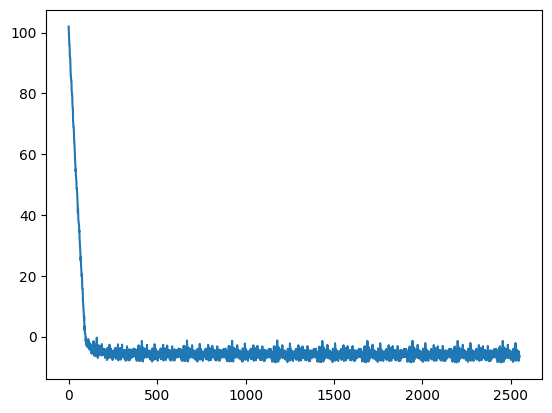

In [136]:
from matplotlib import pyplot as plt
import numpy as np

# optimized_path = os.path.join(
#     env_utils.DEFAULT_RESULTS_DIR,
#     "selection/optimized_heads",
#     mt.name.split("/")[-1],
#     f"{select_task.task_name}.npz"
# )

optimized_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection/optimized_heads",
    model_key.split("/")[-1],
    # "distinct_options",
    f"{select_task.task_name}",
    "epoch_10.npz"
)

optimization_results = np.load(optimized_path, allow_pickle=True)
plt.plot(optimization_results["losses"])
plt.show()

80


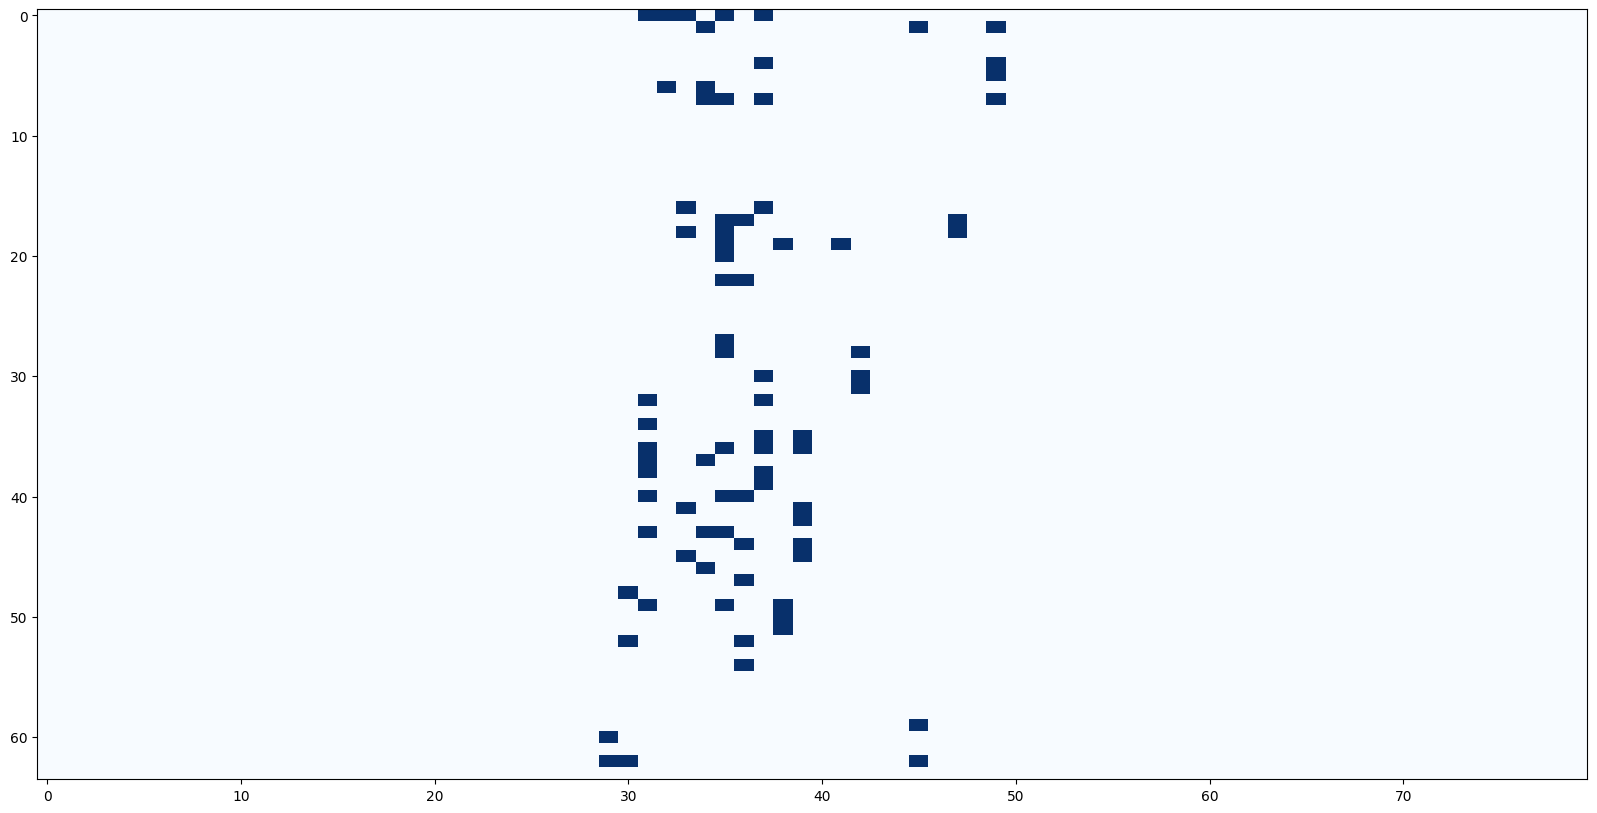

In [137]:
plt.figure(figsize=(20, 10))

optimal_head_mask = torch.tensor(optimization_results["optimal_mask"]).to(torch.float32)
optimal_head_mask[50:, :] = 0.0

plt.imshow(
    optimal_head_mask.T.numpy(),
    cmap="Blues",
    aspect="auto",
    vmin=0,
    vmax=1,
)

heads_selected = torch.nonzero(optimal_head_mask > 0.5, as_tuple=False).tolist()
heads_selected = [
    (layer_idx, head_idx) for layer_idx, head_idx in heads_selected
]
print(len(heads_selected))

# HEADS = heads_selected

# (35, 19) in HEADS, (35, 19) in heads_selected

In [138]:
LIMIT = 256

test_set = []
while len(test_set) < LIMIT:
    logger.info(f"Collecting test samples: {len(test_set) + 1}/{LIMIT}")
    sample = select_task.get_random_sample(
        mt = mt,
        option_style=OPTION_STYLE,
        prompt_template_idx=prompt_template_idx,
        n_distractors=N_DISTRACTORS,
        filter_by_lm_prediction=True,
    )
    test_set.append(sample)

2025-09-07 11:51:28 __main__ INFO     Collecting test samples: 1/256


2025-09-07 11:51:28 __main__ INFO     Collecting test samples: 2/256
2025-09-07 11:51:28 __main__ INFO     Collecting test samples: 3/256
2025-09-07 11:51:28 __main__ INFO     Collecting test samples: 4/256
2025-09-07 11:51:29 __main__ INFO     Collecting test samples: 5/256
2025-09-07 11:51:29 __main__ INFO     Collecting test samples: 6/256
2025-09-07 11:51:29 __main__ INFO     Collecting test samples: 7/256
2025-09-07 11:51:29 __main__ INFO     Collecting test samples: 8/256
2025-09-07 11:51:29 __main__ INFO     Collecting test samples: 9/256
2025-09-07 11:51:30 __main__ INFO     Collecting test samples: 10/256
2025-09-07 11:51:30 __main__ INFO     Collecting test samples: 11/256
2025-09-07 11:51:30 __main__ INFO     Collecting test samples: 12/256
2025-09-07 11:51:30 __main__ INFO     Collecting test samples: 13/256
2025-09-07 11:51:30 __main__ INFO     Collecting test samples: 14/256
2025-09-07 11:51:31 __main__ INFO     Collecting test samples: 15/256
2025-09-07 11:51:31 src.sele

In [ ]:
ind_enrich_results = []
for i, sample in enumerate(test_set):
    logger.info(f"Processing test sample: {i+1}/{len(test_set)}")
    print(sample)
    print(sample.prompt())
    sample_tokenized = prepare_input(
        prompts=sample.prompt(),
        tokenizer=mt.tokenizer,
    )
    interested_tokens = [
        get_first_token_id(opt, mt.tokenizer) for opt in sample.options
    ]
    # clean run
    clean_output = patch_with_baukit(
        mt=mt,
        inputs=sample_tokenized,
        patches=[],
    )
    clean_logits = clean_output.logits[:, -1, :]
    clean_pred, clean_track = interpret_logits(
        logits=clean_logits,
        tokenizer=mt.tokenizer,
        interested_tokens=interested_tokens,
    )
    logger.info(f"clean pred={[str(pred) for pred in clean_pred]}")
    logger.info(f"clean track={clean_track}")
    logger.info("-"*75)

    # get the patches
    patches = get_patches_to_verify_independent_enrichment(
        prompt = sample.prompt(),
        # options=(
        #     [
        #         locate_with_delim(sample.prompt(), opt)
        #         for opt in sample.options
        #     ]
        # ),
        # options=sample.options,
        # options=[locate_with_delim(sample.prompt(), sample.obj)],
        options=[sample.obj],
        # options=sample.options,
        pivot=sample.subj,
        mt=mt,
        tokenized_prompt=sample_tokenized,
        bare_prompt_template="Option: {}"
    )

    # patched run
    patched_out = patch_with_baukit(
        mt=mt,
        inputs=sample_tokenized,
        patches=patches,
    )
    int_logits = patched_out.logits[:, -1, :]
    int_pred, int_track = interpret_logits(
        logits=int_logits,
        tokenizer=mt.tokenizer,
        interested_tokens=[get_first_token_id(opt, mt.tokenizer) for opt in sample.options],
    )
    logger.info(f"int pred={[str(pred) for pred in int_pred]}")
    logger.info(f"int track={int_track}")

    ind_enrich_results.append({
        "sample": sample,
        "interested_tokens": interested_tokens,
        "clean": {
            "pred": clean_pred,
            "track": clean_track,
        },
        "int": {
            "pred": int_pred,
            "track": int_track,
        },
    })
    logger.info("=" * 100)
    

2025-09-07 12:12:37 __main__ INFO     Processing test sample: 1/256


Jacket -> Skirt (2): ['Raspberry', 'Microphone', 'Skirt', 'Refrigerator', 'Football', 'Warehouse']
Which object from the following list is a clothing?
Options: Raspberry, Microphone, Skirt, Refrigerator, Football, Warehouse.
Answer:
2025-09-07 12:12:37 __main__ INFO     clean pred=['" Sk"[4923] (p=0.543, logit=21.000)', '" The"[578] (p=0.289, logit=20.375)', '" A"[362] (p=0.121, logit=19.500)', '" ("[320] (p=0.004, logit=16.125)', '" "[220] (p=0.004, logit=16.125)']
2025-09-07 12:12:37 __main__ INFO     clean track=OrderedDict([(4923, (1, PredictedToken(token=' Sk', prob=0.54296875, logit=21.0, token_id=4923, metadata=None))), (18654, (64, PredictedToken(token=' Micro', prob=7.581710815429688e-05, logit=12.125, token_id=18654, metadata=None))), (48665, (217, PredictedToken(token=' Raspberry', prob=5.155801773071289e-06, logit=9.4375, token_id=48665, metadata=None))), (21424, (250, PredictedToken(token=' Football', prob=4.559755325317383e-06, logit=9.3125, token_id=21424, metadata=None)

2025-09-07 12:16:26 __main__ INFO     Independent enrichment accuracy: 89.45%


Text(0.5, 0, 'Object Index')

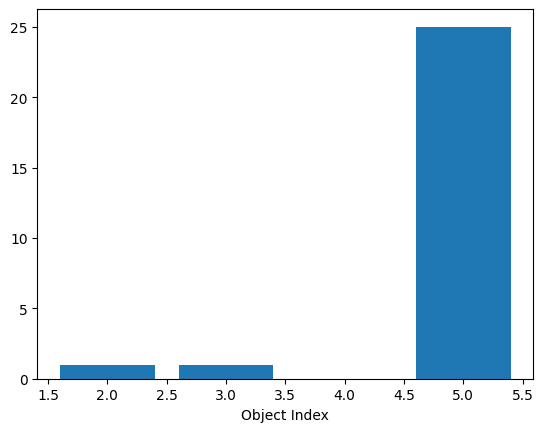

In [153]:
passed_cases = []
failed_cases = []

for result in ind_enrich_results:
    sample = result["sample"]
    int_track = result["int"]["track"]
    if int_track[list(int_track.keys())[0]][1].token_id == sample.ans_token_id:
        passed_cases.append(result)
    else:
        failed_cases.append(result)

accuracy = len(passed_cases) / len(ind_enrich_results)
logger.info(f"Independent enrichment accuracy: {accuracy*100:.2f}%")

failed_positions = {}
for result in failed_cases:
    sample = result["sample"]
    obj_idx = sample.obj_idx
    if obj_idx not in failed_positions:
        failed_positions[obj_idx] = 0
    failed_positions[obj_idx] += 1

from matplotlib import pyplot as plt
plt.bar(failed_positions.keys(), failed_positions.values())
plt.xlabel("Object Index")

In [149]:
from src.tokens import prepare_input, TokenizerOutput, find_token_range
from src.selection.functional import verify_head_patterns

sample_idx = 12
# sample = passed_cases[sample_idx]["sample"]
sample = failed_cases[sample_idx]["sample"]
sample_tokenized = prepare_input(
    prompts=sample.prompt(),
    tokenizer=mt.tokenizer,
)
def locate_with_delim(prompt, option):
    st = prompt.index(option)
    return prompt[st : st + len(option) + 1]

attn_pattern = verify_head_patterns(  # noqa
    prompt=sample.prompt(),
    tokenized_prompt=sample_tokenized,
    # options=(
    #     [
    #         locate_with_delim(sample.prompt(), opt)
    #         for opt in sample.options
    #     ]
    # ),
    # options=[locate_with_delim(sample.prompt(), sample.obj)], #! Less destructive. But I think it convays the same point
    options=[f"{sample.obj}"], #! Without delim. the LM can store some info there.
    pivot=sample.subj,
    mt=mt,
    # heads=[(35, 19)],
    heads=heads_selected,
    # generate_full_answer=True,
    query_index=-1,
    ablate_possible_ans_info_from_options=True,
    bare_prompt_template="Option: {}",
    # bare_prompt_template=" A {}", #! Not bad, a bit inconsistent. Probably `A Pear` is less common. Not a problem when the option is a person.
    # bare_prompt_template=" {}", #! Breaks attn pattern and LM performance. Maybe the LM deals with first token differently. 
)

2025-09-07 12:06:31 src.selection.functional DEBUG    Onion | opt_range=(15, 16) | bare_opt_range=(3, 4)
2025-09-07 12:06:31 src.selection.functional DEBUG    opt=" Onion" | bare_opt=" Onion"
2025-09-07 12:06:31 src.selection.functional DEBUG    After adjusted bare_opt_range=(15, 16): bare_opt=" Onion"


2025-09-07 12:06:32 src.selection.functional DEBUG    Predictions: ['" Onion"[87035] (p=0.621, logit=20.250)', '" The"[578] (p=0.157, logit=18.875)', '" An"[1556] (p=0.123, logit=18.625)', '" Plum"[84409] (p=0.013, logit=16.375)', '" Only"[8442] (p=0.006, logit=15.625)']
2025-09-07 12:06:32 src.selection.functional INFO     Combined attention matrix for all heads


In [79]:
passed_cases[sample_idx]["int"]["pred"], passed_cases[sample_idx]["clean"]["pred"] 

([PredictedToken(token=' None', prob=0.376953125, logit=14.875, token_id=2290, metadata=None),
  PredictedToken(token=' A', prob=0.115234375, logit=13.6875, token_id=362, metadata=None),
  PredictedToken(token=' The', prob=0.083984375, logit=13.375, token_id=578, metadata=None),
  PredictedToken(token=' An', prob=0.037353515625, logit=12.5625, token_id=1556, metadata=None),
  PredictedToken(token=' B', prob=0.03515625, logit=12.5, token_id=426, metadata=None)],
 [PredictedToken(token=' Birch', prob=0.6796875, logit=21.0, token_id=88088, metadata=None),
  PredictedToken(token=' The', prob=0.1337890625, logit=19.375, token_id=578, metadata=None),
  PredictedToken(token=' Among', prob=0.091796875, logit=19.0, token_id=22395, metadata=None),
  PredictedToken(token=' A', prob=0.0159912109375, logit=17.25, token_id=362, metadata=None),
  PredictedToken(token=' (', prob=0.01239013671875, logit=17.0, token_id=320, metadata=None)])

In [80]:
from src.selection.functional import get_patches_to_verify_independent_enrichment
from src.functional import patch_with_baukit, patch_with_nnsight


patches = get_patches_to_verify_independent_enrichment(
    prompt = sample.prompt(),
    # options=["Options: Folder, Birch, Bat, Chain, Accordion, Air fryer.\n"],
    options=["Birch,"],
    pivot=sample.subj,
    mt=mt,
    tokenized_prompt=sample_tokenized,
)

patched_run = patch_with_baukit(
    mt=mt,
    inputs=sample_tokenized,
    patches=patches,
)

patched_logits = patched_run.logits[0, -1, :]
interpret_logits(
    logits=patched_logits,
    tokenizer=mt.tokenizer,
)

2025-09-07 11:21:15 src.selection.functional DEBUG    Birch, | opt_range=(5, 7) | bare_opt_range=(1, 3)
2025-09-07 11:21:15 src.selection.functional DEBUG    opt=" Birch," | bare_opt=" Birch,"
2025-09-07 11:21:15 src.selection.functional DEBUG    After adjusted bare_opt_range=(5, 7): bare_opt=" Birch,"


[PredictedToken(token=' Birch', prob=0.341796875, logit=18.5, token_id=88088, metadata=None),
 PredictedToken(token=' None', prob=0.2080078125, logit=18.0, token_id=2290, metadata=None),
 PredictedToken(token=' The', prob=0.142578125, logit=17.625, token_id=578, metadata=None),
 PredictedToken(token=' A', prob=0.041015625, logit=16.375, token_id=362, metadata=None),
 PredictedToken(token=' Bat', prob=0.0247802734375, logit=15.875, token_id=16488, metadata=None)]

In [77]:
patches

[PatchSpec(location=('model.layers.0', 5), patch=tensor([-0.0063, -0.0109,  0.0114,  ...,  0.0025, -0.0112, -0.0104],
        device='cuda:0', dtype=torch.bfloat16), clean=None, strategy='replace'),
 PatchSpec(location=('model.layers.1', 5), patch=tensor([-0.0058, -0.0012,  0.0112,  ...,  0.0068, -0.0071, -0.0088],
        device='cuda:0', dtype=torch.bfloat16), clean=None, strategy='replace'),
 PatchSpec(location=('model.layers.2', 5), patch=tensor([-0.0019, -0.0031,  0.0139,  ...,  0.0046, -0.0109, -0.0017],
        device='cuda:0', dtype=torch.bfloat16), clean=None, strategy='replace'),
 PatchSpec(location=('model.layers.3', 5), patch=tensor([ 0.0037,  0.0114,  0.0168,  ..., -0.0044, -0.0085,  0.0079],
        device='cuda:0', dtype=torch.bfloat16), clean=None, strategy='replace'),
 PatchSpec(location=('model.layers.4', 5), patch=tensor([-0.0084,  0.0091,  0.0161,  ..., -0.0003, -0.0059,  0.0125],
        device='cuda:0', dtype=torch.bfloat16), clean=None, strategy='replace'),
 Patc